In [ ]:
# В сфере управления персоналом и организационным поведением абсентеизм персонала означает, что сотрудники часто отсутствуют на своем рабочем месте без уважительной на то причины. Частые подобные отсутствия сотрудников на работе служат своеобразным индикатором ухудшения внутриорганизационного климата.Помимо этого, это крупные расходы для большинства организаций. Получение информации о нем, его прогнозирование и влияние на него очень важны для организаций. Этот набор данных предоставлен специалистам по работе с данными в области HR для практической работы. 

Ссылка на датасет: https://www.kaggle.com/HRAnalyticRepository/absenteeism-dataset


# Общий обзор данных

In [31]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from scipy import stats

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [32]:
# загружаем файл с данными
df_hr = pd.read_csv(r"C:\Users\kate0\OneDrive\Desktop\Питон ДЗ_HR аналитика\hse_hr_data-main\Final Project\MFGEmployees4.csv")

In [33]:
# какие столбцы есть в нашем датасете?
df_hr.columns

Index(['EmployeeNumber', 'Surname', 'GivenName', 'Gender', 'City', 'JobTitle',
       'DepartmentName', 'StoreLocation', 'Division', 'Age', 'LengthService',
       'AbsentHours', 'BusinessUnit'],
      dtype='object')

In [34]:
# Поскольку датасет содержит не слишком много столбцов, выведем его на экран
df_hr

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.029,6.018,36.577,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.321,5.532,30.165,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822,4.390,83.808,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599,3.082,70.020,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.698,3.619,0.000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.058,4.838,93.665,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455,2.427,0.000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347,4.009,176.357,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.341,6.155,60.322,Stores


In [35]:
# набор содержит большой объем данных о 8336 сотрудниках - 
# в том числе данные о каждом, город, количество часов отсутствия, бизнес подразделение

In [36]:
# Разделим столбцы по типу данных, которые в них содержатся
df_hr.columns.to_series().groupby(df_hr.dtypes).groups

{int64: ['EmployeeNumber'], float64: ['Age', 'LengthService', 'AbsentHours'], object: ['Surname', 'GivenName', 'Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation', 'Division', 'BusinessUnit']}

In [37]:
# Проверим датасет на наличие пустых значений
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8336 non-null   int64  
 1   Surname         8336 non-null   object 
 2   GivenName       8336 non-null   object 
 3   Gender          8336 non-null   object 
 4   City            8336 non-null   object 
 5   JobTitle        8336 non-null   object 
 6   DepartmentName  8336 non-null   object 
 7   StoreLocation   8336 non-null   object 
 8   Division        8336 non-null   object 
 9   Age             8336 non-null   float64
 10  LengthService   8336 non-null   float64
 11  AbsentHours     8336 non-null   float64
 12  BusinessUnit    8336 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 846.8+ KB


In [38]:
# Пустых значений в датасете нет. 
# 9 столбцов содержат текстовые значения, 3 столбца представлены числами с плавающей точкой, 1 столбец - целыми числами.

In [39]:
# Отрисуем таблицу
pd.options.display.max_columns = 999
df_hr

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.029,6.018,36.577,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.321,5.532,30.165,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822,4.390,83.808,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599,3.082,70.020,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.698,3.619,0.000,Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.058,4.838,93.665,Stores
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455,2.427,0.000,Stores
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347,4.009,176.357,Stores
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.341,6.155,60.322,Stores


In [40]:
df_hr.head(5)
#выведем первые 5 строк таблицы

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.029,6.018,36.577,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.321,5.532,30.165,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822,4.390,83.808,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599,3.082,70.020,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.698,3.619,0.000,Stores


In [41]:
# Идентифицируем категориальные переменные
df_objects = df_hr.select_dtypes(include=['object']).copy() 

# И сохраним как переменную
print(df_objects.columns.values,'\n')

['Surname' 'GivenName' 'Gender' 'City' 'JobTitle' 'DepartmentName'
 'StoreLocation' 'Division' 'BusinessUnit'] 



In [42]:
# Посмотрим уникальные значения этих переменных

for i in df_objects.columns.values:
    print(i,':', df_hr[i].unique(),'\n')

Surname : ['Gutierrez' 'Hardwick' 'Delgado' ... 'Bosworth' 'Sheaffer' 'Coniglio'] 

GivenName : ['Molly' 'Stephen' 'Chester' ... 'Hui' 'Camille' 'Bianca'] 

Gender : ['F' 'M'] 

City : ['Burnaby' 'Courtenay' 'Richmond' 'Victoria' 'New Westminster' 'Vancouver'
 'Sechelt' 'Kamloops' 'North Vancouver' 'Vananda' 'West Vancouver'
 'Nanaimo' 'Aldergrove' 'Kelowna' 'Trail' 'Penticton' 'Duncan'
 'Crawford Bay' 'Port Hardy' 'Logan Lake' 'Abbotsford' 'Dawson Creek'
 'Surrey' 'Squamish' 'Good Hope Lake' 'Sidney' 'Coquitlam' 'Chilliwack'
 'Okanagan Mission' 'Ganges' 'Prince George' 'Atlin' 'Whistler'
 'Spences Bridge' 'New Westminister' 'Gibsons' 'Vernon' 'Fauquier'
 'Mackenzie' 'Gold Bridge' 'Fort Fraser' 'Nelson' 'Kaslo' 'Creston'
 'Wynndel' 'Muncho Lake' 'Kitimat' 'Lac La Hache' 'Armstrong' 'Quesnel'
 'Hixon' 'Ocean Falls' 'Vallican' 'North Pender Island' 'Montney'
 'Burns Lake' 'Midway' 'Westwold' 'Terrace' 'Golden' 'Port Coquitlam'
 'White Rock' 'Summerland' 'Langley' 'Huntingdon' 'Yale' 'Aiy

# Обзор числовых характеристик

In [43]:
df_hr.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000,8336.000,8336.000,8336.000
mean,4168.500,42.007,4.783,61.284
std,2406.540,9.940,2.463,49.038
min,1.000,3.505,0.012,0.000
25%,2084.750,35.299,3.576,19.128
50%,4168.500,42.115,4.600,56.006
75%,6252.250,48.667,5.624,94.285
max,8336.000,77.938,43.735,272.530


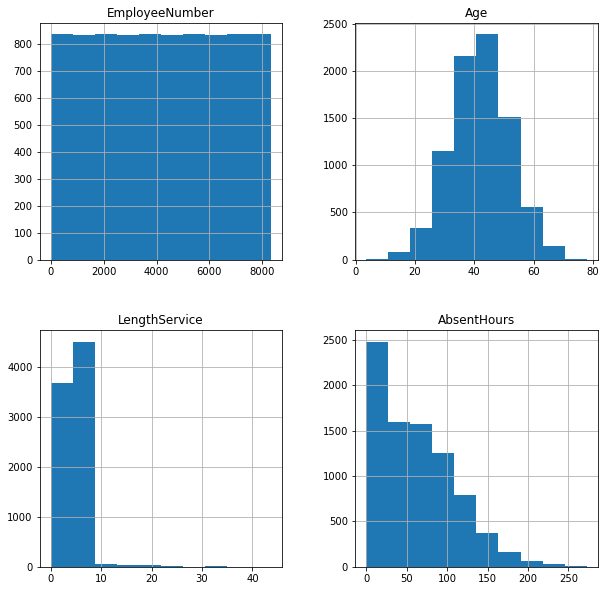

In [45]:
df_hr.hist(figsize=(10,10))
plt.show()

In [47]:
# Проверим, является ли распределение сотрудников по показателю возраста нормальным
# H0: показатель возраста распределен по нормальному закону
# H1: закон распределения показателя возраста не является нормальным

print (stats.shapiro(df_hr['Age']))

ShapiroResult(statistic=0.9997943043708801, pvalue=0.6393189430236816)


In [51]:
print (stats.shapiro(df_hr['AbsentHours']))

ShapiroResult(statistic=0.9418719410896301, pvalue=0.0)


In [52]:
# Матрица корреляций по всему фрейму
df_hr.corr()

,EmployeeNumber,Age,LengthService,AbsentHours
EmployeeNumber,1.000,-0.018,-0.120,0.007
Age,-0.018,1.000,0.053,0.830
LengthService,-0.120,0.053,1.000,-0.044
AbsentHours,0.007,0.830,-0.044,1.000


In [ ]:
# В датасете найдены высокие корелляции - возраст сотрудника и количество часов отсутствия (коэффициент корелляции - 0,83)

<AxesSubplot:>

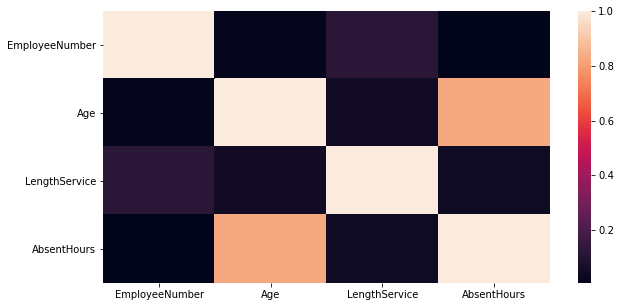

In [54]:
# Визуализируем корреляции с помощью тепловой карты
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(abs(df_hr.corr()),ax=ax)

# Исследование данных

In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [56]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [80]:
# выведем последние 5 строчек датасета
df_hr.tail()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit,CityID,JobTitleID,DepartmentNameID,StoreLocationID,DivisionID,BusinessUnitID,SurnameID,GivenNameID
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.058,4.838,93.665,Stores,120,9,6,16,5,1,765,159
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455,2.427,0.000,Stores,137,9,6,11,5,1,818,770
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347,4.009,176.357,Stores,228,9,6,37,5,1,1661,1072
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.341,6.155,60.322,Stores,222,14,7,34,5,1,2985,1504
8335,8336,Salter,Charles,M,Vancouver,Dairy Person,Dairy,Vancouver,Stores,46.193,5.175,112.023,Stores,222,14,7,34,5,1,3240,254


In [81]:
# Перекодируем категориальные переменные в целые числа
df_hr['CityID'] = pd.Categorical(df_hr.City).codes
df_hr[['CityID','City']]

,CityID,City
0,28,Burnaby
1,51,Courtenay
2,179,Richmond
3,226,Victoria
4,143,New Westminster
...,...,...
8331,120,Langley
8332,137,Montney
8333,228,West Vancouver
8334,222,Vancouver


In [82]:
# Перекодируем категориальные переменные в целые числа
df_hr['SurnameID'] = pd.Categorical(df_hr.Surname).codes
df_hr[['SurnameID','Surname']]

,SurnameID,Surname
0,1555,Gutierrez
1,1617,Hardwick
2,940,Delgado
3,3414,Simon
4,945,Delvalle
...,...,...
8331,765,Coniglio
8332,818,Cox
8333,1661,Hawkins
8334,2985,Proctor


In [83]:
# Перекодируем категориальные переменные в целые числа
df_hr['GivenNameID'] = pd.Categorical(df_hr.GivenName).codes
df_hr[['GivenNameID','GivenName']]

,GivenNameID,GivenName
0,1140,Molly
1,1452,Stephen
2,264,Chester
3,687,Irene
4,449,Edward
...,...,...
8331,159,Bianca
8332,770,Jimmie
8333,1072,Mary
8334,1504,Theresa


In [84]:
# Перекодируем категориальные переменные в целые числа
df_hr['JobTitleID'] = pd.Categorical(df_hr.JobTitle).codes
df_hr[['JobTitleID','JobTitle']]

,JobTitleID,JobTitle
0,4,Baker
1,4,Baker
2,4,Baker
3,4,Baker
4,4,Baker
...,...,...
8331,9,Cashier
8332,9,Cashier
8333,9,Cashier
8334,14,Dairy Person


In [85]:
# Перекодируем категориальные переменные в целые числа
df_hr['DepartmentNameID'] = pd.Categorical(df_hr.DepartmentName).codes
df_hr[['DepartmentNameID','DepartmentName']]

,DepartmentNameID,DepartmentName
0,4,Bakery
1,4,Bakery
2,4,Bakery
3,4,Bakery
4,4,Bakery
...,...,...
8331,6,Customer Service
8332,6,Customer Service
8333,6,Customer Service
8334,7,Dairy


In [108]:
# Перекодируем категориальные переменные в целые числа
df_hr['GenderID'] = pd.Categorical(df_hr.Gender).codes
df_hr[['GenderID','Gender']]

,GenderID,Gender
0,0,F
1,1,M
2,1,M
3,0,F
4,1,M
...,...,...
8331,0,F
8332,1,M
8333,0,F
8334,0,F


In [86]:
# Перекодируем категориальные переменные в целые числа
df_hr['StoreLocationID'] = pd.Categorical(df_hr.StoreLocation).codes
df_hr[['StoreLocationID','StoreLocation']]

,StoreLocationID,StoreLocation
0,4,Burnaby
1,17,Nanaimo
2,28,Richmond
3,36,Victoria
4,20,New Westminster
...,...,...
8331,16,Langley
8332,11,Fort St John
8333,37,West Vancouver
8334,34,Vancouver


In [87]:
# Перекодируем категориальные переменные в целые числа
df_hr['DivisionID'] = pd.Categorical(df_hr.Division).codes
df_hr[['DivisionID','Division']]

,DivisionID,Division
0,5,Stores
1,5,Stores
2,5,Stores
3,5,Stores
4,5,Stores
...,...,...
8331,5,Stores
8332,5,Stores
8333,5,Stores
8334,5,Stores


In [88]:
# Перекодируем категориальные переменные в целые числа
df_hr['BusinessUnitID'] = pd.Categorical(df_hr.BusinessUnit).codes
df_hr[['BusinessUnitID','BusinessUnit']]

,BusinessUnitID,BusinessUnit
0,1,Stores
1,1,Stores
2,1,Stores
3,1,Stores
4,1,Stores
...,...,...
8331,1,Stores
8332,1,Stores
8333,1,Stores
8334,1,Stores


In [89]:
# Выведем таблицу с новыми переменными
pd.options.display.max_columns = 999
df_hr.tail()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit,CityID,JobTitleID,DepartmentNameID,StoreLocationID,DivisionID,BusinessUnitID,SurnameID,GivenNameID
8331,8332,Coniglio,Bianca,F,Langley,Cashier,Customer Service,Langley,Stores,46.058,4.838,93.665,Stores,120,9,6,16,5,1,765,159
8332,8333,Cox,Jimmie,M,Montney,Cashier,Customer Service,Fort St John,Stores,34.455,2.427,0.000,Stores,137,9,6,11,5,1,818,770
8333,8334,Hawkins,Mary,F,West Vancouver,Cashier,Customer Service,West Vancouver,Stores,58.347,4.009,176.357,Stores,228,9,6,37,5,1,1661,1072
8334,8335,Proctor,Theresa,F,Vancouver,Dairy Person,Dairy,Vancouver,Stores,43.341,6.155,60.322,Stores,222,14,7,34,5,1,2985,1504
8335,8336,Salter,Charles,M,Vancouver,Dairy Person,Dairy,Vancouver,Stores,46.193,5.175,112.023,Stores,222,14,7,34,5,1,3240,254


In [109]:
X = df_hr[['EmployeeNumber','SurnameID','GivenNameID', 'GenderID','CityID', 'JobTitleID', 'DepartmentNameID', 
           'StoreLocationID', 'Age','DivisionID','LengthService', 'BusinessUnitID']]

Y = df_hr[['AbsentHours']]

In [110]:
# В объекте X оказываются признаки
X

,EmployeeNumber,SurnameID,GivenNameID,GenderID,CityID,JobTitleID,DepartmentNameID,StoreLocationID,Age,DivisionID,LengthService,BusinessUnitID
0,1,1555,1140,0,28,4,4,4,32.029,5,6.018,1
1,2,1617,1452,1,51,4,4,17,40.321,5,5.532,1
2,3,940,264,1,179,4,4,28,48.822,5,4.390,1
3,4,3414,687,0,226,4,4,36,44.599,5,3.082,1
4,5,945,449,1,143,4,4,20,35.698,5,3.619,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8332,765,159,0,120,9,6,16,46.058,5,4.838,1
8332,8333,818,770,1,137,9,6,11,34.455,5,2.427,1
8333,8334,1661,1072,0,228,9,6,37,58.347,5,4.009,1
8334,8335,2985,1504,0,222,14,7,34,43.341,5,6.155,1


In [111]:
# В объекте Y оказываются ответы для этих признаков
Y

,AbsentHours
0,36.577
1,30.165
2,83.808
3,70.020
4,0.000
...,...
8331,93.665
8332,0.000
8333,176.357
8334,60.322


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Посмотрим, каков оказался размер объектов в трейне и тесте
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6668, 12)
(1668, 12)
(6668, 1)
(1668, 1)


In [114]:
Y_test

,AbsentHours
3470,182.481
2301,0.000
7979,0.000
932,25.175
7466,66.641
...,...
4614,46.045
8220,51.779
1097,5.957
548,109.553


# Моделирование

# Моделирование

In [115]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [123]:
# Посмотрим, какие из признаков оказались наиболее значимыми для предсказания количества прогулянных часов
importance = lin_model.coef_
print(importance)

[[ 1.91699208e-04 -4.27276810e-06 -4.22640771e-07 -1.65233766e+01
   8.95641801e-05  6.41989238e-02 -2.53329033e-01 -3.57086000e-03
   4.19464725e+00  1.08520863e+00 -8.36556545e-01  1.94179866e+01]]


In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [127]:
def model_access(lin_model, X_train, X_test, Y_train, Y_test):

    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

# Оценка модели

In [129]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 25.48704714401473
R2 score is 0.7335196123052132
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 25.95322277545233
R2 score is 0.7032269881486792


In [130]:
X_test

,EmployeeNumber,SurnameID,GivenNameID,GenderID,CityID,JobTitleID,DepartmentNameID,StoreLocationID,Age,DivisionID,LengthService,BusinessUnitID
3470,3471,3983,952,0,206,37,17,30,59.790,5,5.289,1
2301,2302,73,952,0,141,5,4,18,27.065,5,5.768,1
7979,7980,3097,1220,0,171,9,6,25,25.199,5,6.099,1
932,933,2025,997,0,48,9,6,17,32.634,5,6.752,1
7466,7467,2786,88,1,165,9,6,17,50.664,5,3.953,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4614,4615,2058,188,1,160,14,7,23,39.610,5,5.318,1
8220,8221,271,365,0,143,9,6,20,41.713,5,3.127,1
1097,1098,560,865,0,143,14,7,20,40.213,5,4.588,1
548,549,3025,1415,0,231,4,4,29,46.402,5,3.524,1


In [ ]:
# R2-score (доля объясняемой нашими фичами информации) высокая (0.7), но всё же можно попробовать приблизить 
# этот результат к единице.

In [131]:
# # Уберем из модели факторы, который на наш взгляд минимально влияют на количество прогулянных часов.
X = df_hr[['GenderID','Age','DivisionID','LengthService', 'BusinessUnitID']]

Y = df_hr[['AbsentHours']]

In [132]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [133]:
importance = lin_model.coef_
print(importance)

[[ 1.91699208e-04 -4.27276810e-06 -4.22640771e-07 -1.65233766e+01
   8.95641801e-05  6.41989238e-02 -2.53329033e-01 -3.57086000e-03
   4.19464725e+00  1.08520863e+00 -8.36556545e-01  1.94179866e+01]]


In [134]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 25.48704714401473
R2 score is 0.7335196123052132
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 25.95322277545233
R2 score is 0.7032269881486792


In [ ]:
# В результате удаления из модели нескольких признаков R2-score ни в трейновой, ни в тестовой базе R2 не изменился. 
# Значит, эта модель объясняет всё так же, как и прошлая.


# Cкалирование признаков

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [138]:
X = df_hr[['GenderID','Age','DivisionID','LengthService', 'BusinessUnitID']]
X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

importance = lin_model.coef_
print(importance)

[[-16.49733737 312.26058581   2.55830554 -36.82604956  21.72937645]]


In [139]:
model_access(lin_model, X_train, X_test, Y_train, Y_test)



The model performance for training set
--------------------------------------
RMSE is 25.49516210685321
R2 score is 0.7333498929420494
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 25.922219196862894
R2 score is 0.7039356114844632


In [ ]:
# Скалирование признаков дало увеличение R2 на несколько тысячных, что не очень существенно.